In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [5]:
diamonds.shape

(53940, 11)

In [6]:
diamond_cols = diamonds.columns
diamond_cols

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

    Drop extra index column

In [7]:
diamonds.drop("Unnamed: 0",axis = 1,inplace=True)
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [8]:
diamond_cols = diamonds.columns
diamonds.shape

(53940, 10)

In [9]:
for col in ["cut",	"color"	,"clarity"]:
    print(f"{col}: {diamonds[col].unique()}\n")

cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']

clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color diamond colour, from J (worst) to D (best)

- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [11]:
clarity_order = ("I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF")
color_order = ["D","E","F","G","H","I","J"]
color_order.reverse()
color_order = tuple(color_order)
cut_order = ("Fair", "Good", "Very Good", "Premium", "Ideal")
print(f"Cut: {cut_order}\n\
Color: {color_order}\n\
Clarity: {clarity_order}")

Cut: ('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')
Color: ('J', 'I', 'H', 'G', 'F', 'E', 'D')
Clarity: ('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF')


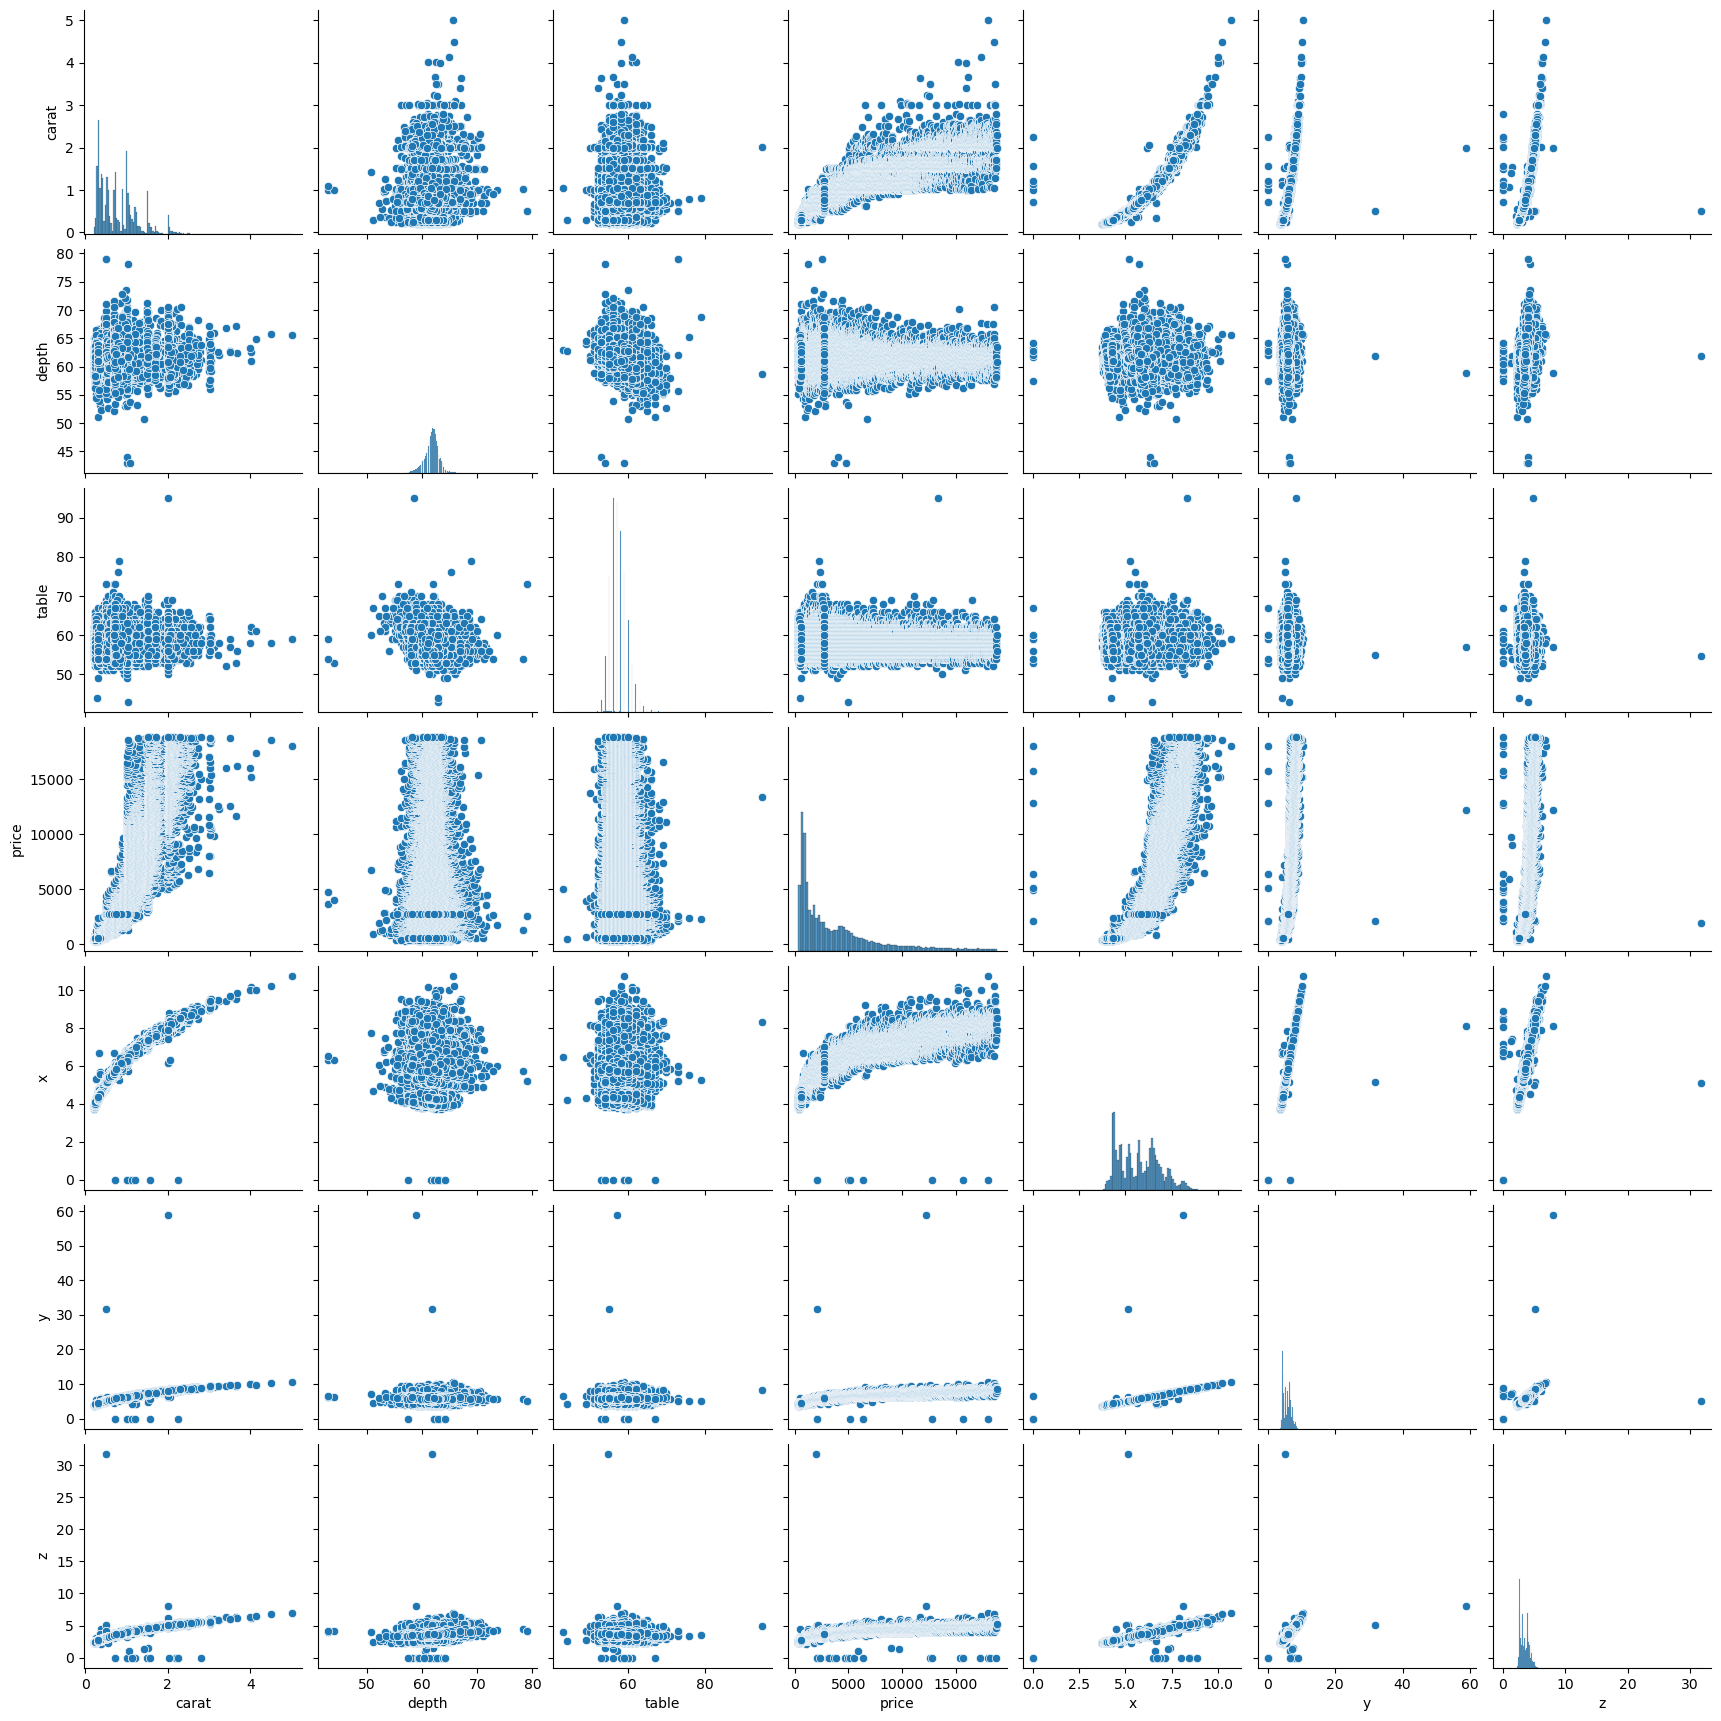

In [12]:
sns.pairplot(diamonds)
plt.show()

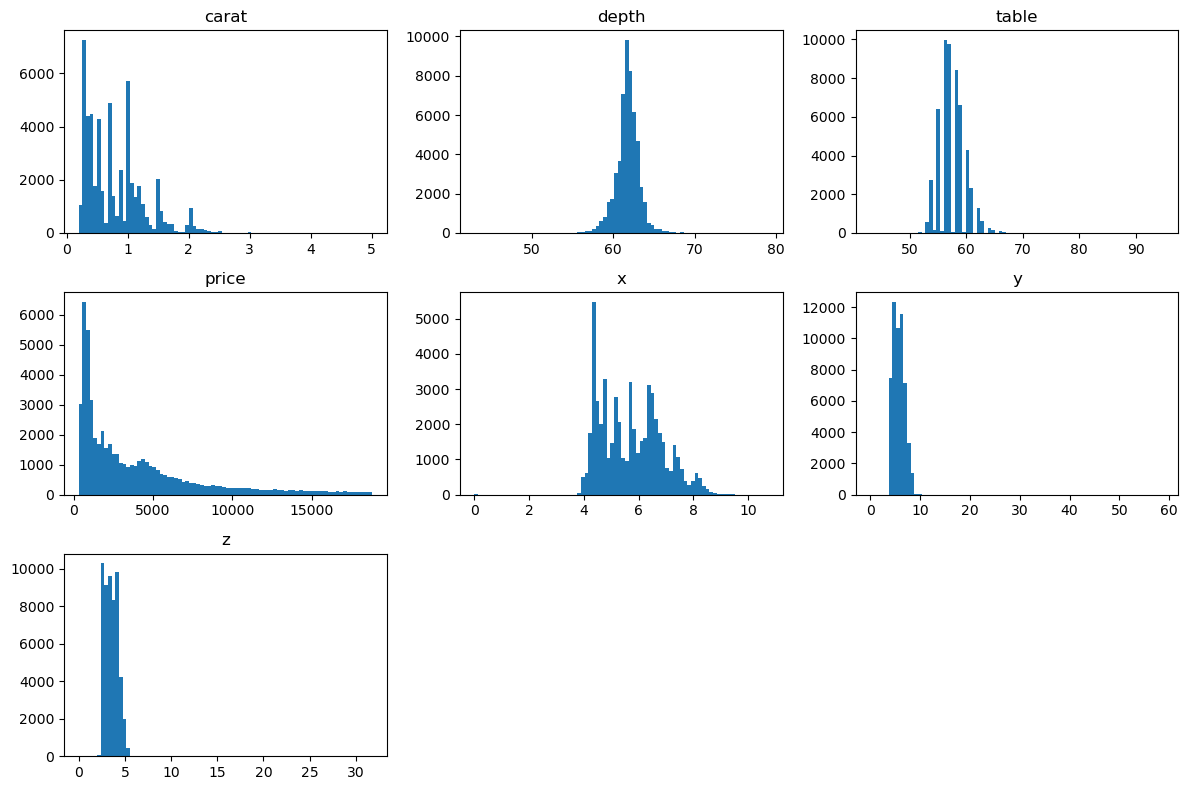

In [13]:
diamonds.hist(grid=False,figsize=(12,8),bins=80)
plt.tight_layout()
plt.show()

In [14]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [15]:
diamonds_num_cols = ['carat', 'depth', 'table', 'x', 'y','z', 'price']

#### Baseline Model

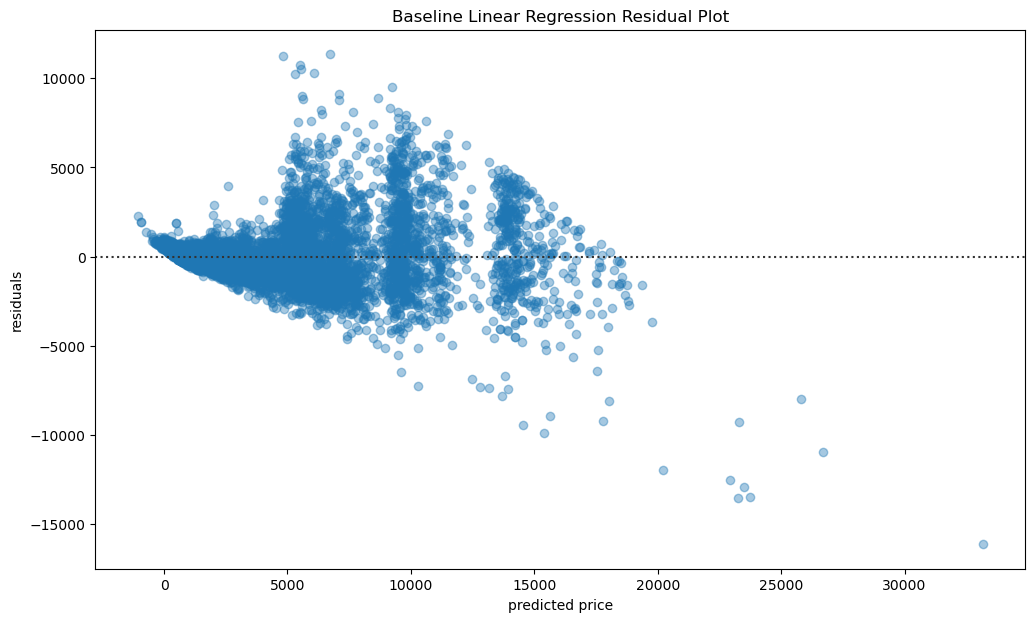


RMSE: 1482.0231
R^2: 0.8614


In [17]:
#BASELINE LINEAR MODEL WITH NUMERICAL FEATURES
x=diamonds[diamonds_num_cols].iloc[:,:-1].values 
y=diamonds[diamonds_num_cols].iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

regression=LinearRegression()
regression.fit(x_train,y_train)

y_hat = regression.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})

plt.title("Baseline Linear Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)

metrics = list()
metrics.append({"Model":"Linear_Baseline",
               "RMSE":rmse,
               "R^2":r2})


print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    The R^2 value is reasonably high, indicating that the features are likely already highly correlated, and may be overfitting the model. However, the residual plot shows a very irregular scatter of values, showing that despite the apparent correlations, the predictions aren't very accurate yet and may be affected by bias (e.g., skew). The RMSE value will be more useful once it can be compared to future models. 

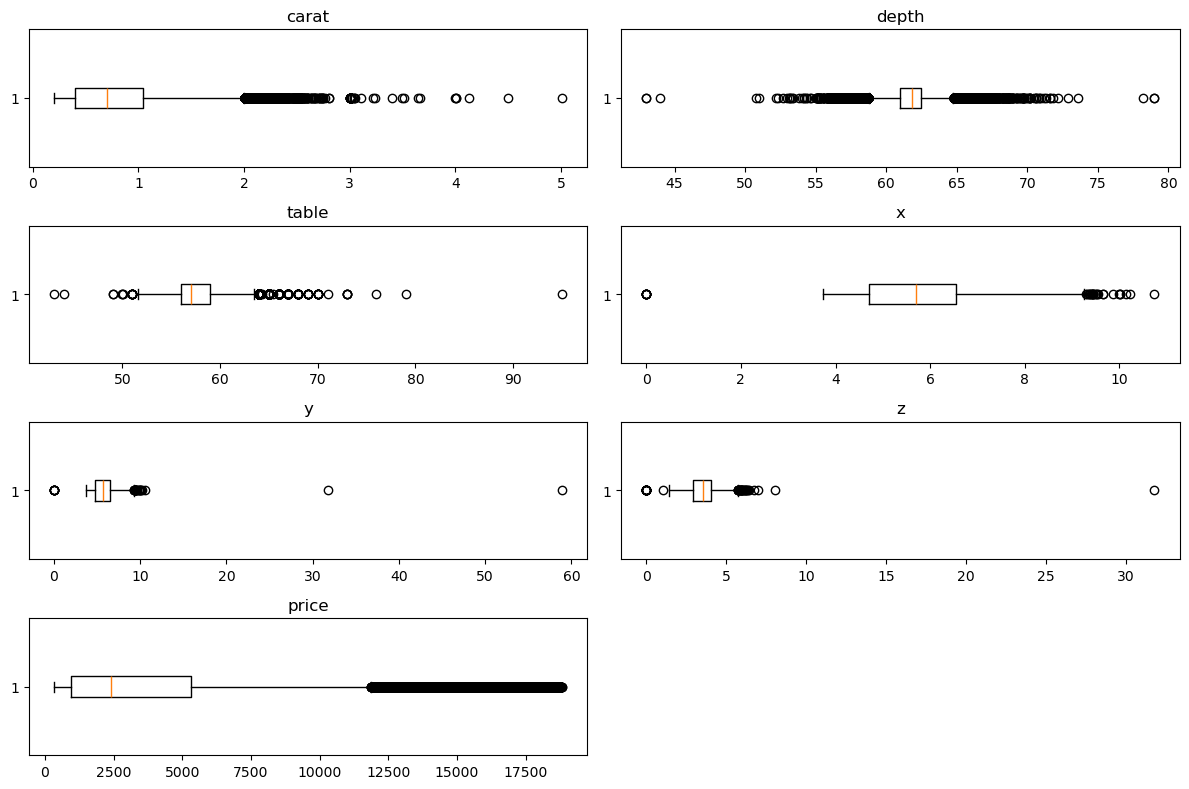

In [19]:
plt.figure(figsize = (12,8))
for ind,col in enumerate(diamonds_num_cols):
    plt.subplot(4,2,ind+1)
    plt.boxplot(diamonds[col],vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

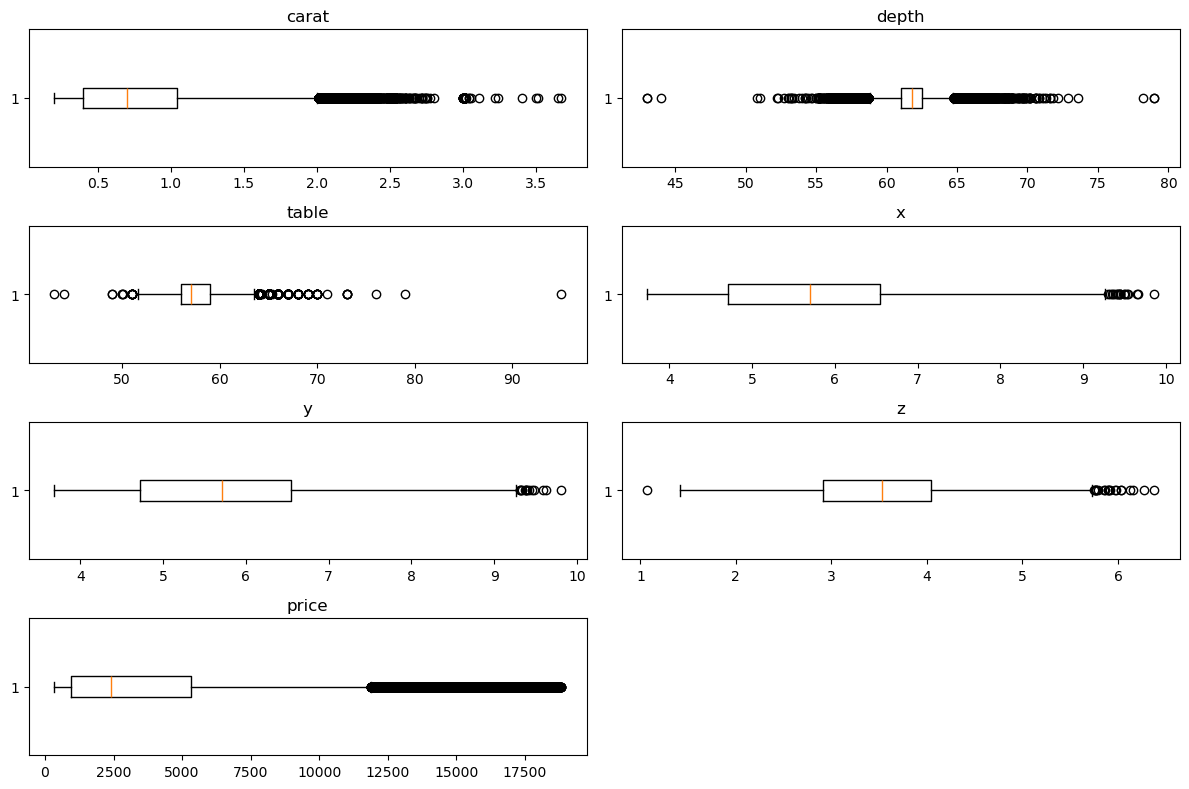

In [21]:
#Preliminary removal of outliers based on histogrammed distributions and boxplots
diamonds = diamonds[(diamonds["y"] < 20) & (diamonds["y"] != 0)] 
diamonds = diamonds[(diamonds["x"] < 10) & (diamonds["x"] != 0)] 
diamonds = diamonds[(diamonds["z"] < 20) & (diamonds["z"] != 0)] 

plt.figure(figsize = (12,8))
for ind,col in enumerate(diamonds_num_cols):
    plt.subplot(4,2,ind+1)
    plt.boxplot(diamonds[col],vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

### Encoding

    I will be encoding columns with irregular distributions, such as carat, and categorical features, such as clarity and cut

#### Normalizing 

In [25]:
from scipy.stats import boxcox

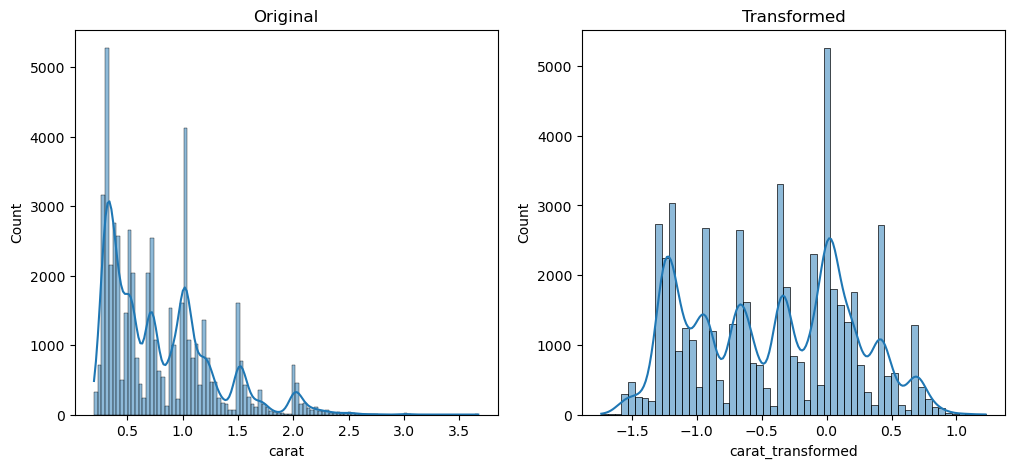

In [26]:
#diamonds["carat_transformed"]=diamonds["carat"].apply(lambda x: np.log1p(x))

diamonds["carat_transformed"],_ = boxcox(diamonds["carat"])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(diamonds["carat"],kde=True)
plt.title("Original")
plt.subplot(1,2,2)
sns.histplot(diamonds["carat_transformed"],kde=True)
plt.title('Transformed')
plt.show()

    Transforming this feature does not seem to be beneficial

In [28]:
diamonds.drop("carat_transformed",axis=1,inplace=True)

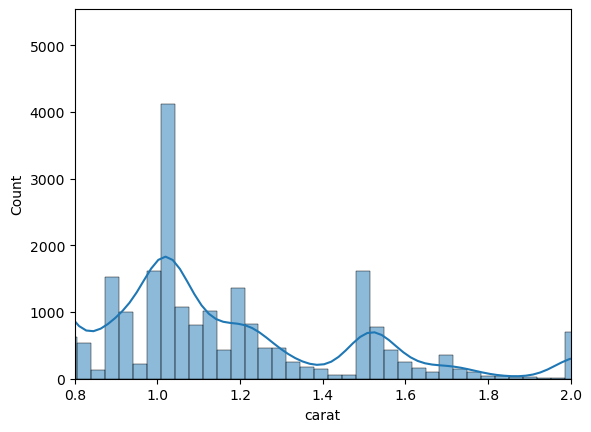

In [29]:
sns.histplot(diamonds["carat"],kde=True)
plt.xlim(0.8,2)
plt.show()

In [30]:
# Subdivisions based on the peaks in the histogram

In [31]:
def carat(x):
    if x <= 0.45:
        return 1
    elif x <= 0.65:
        return 2
    elif x <= 1.4:
        return 3
    elif x <= 2:
        return 4
    else:
        return 5

In [32]:
diamonds["carat_encoded"] = diamonds["carat"].apply(lambda x: carat(x))
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   carat_encoded  
0              1  
1              1  
2              1  
3              1  
4              1

In [33]:
diamonds["carat_encoded"].value_counts()

carat_encoded
3    22485
1    17289
2     7743
4     4517
5     1877
Name: count, dtype: int64

In [34]:
print(f"Cut: {cut_order}\n\
Color: {color_order}\n\
Clarity: {clarity_order}")

Cut: ('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')
Color: ('J', 'I', 'H', 'G', 'F', 'E', 'D')
Clarity: ('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF')


In [35]:
def categorical(x,order):
    for ind,cat in enumerate(order):
        if x == cat:
            return ind+1

diamonds[f"cut_encoded"] = diamonds["cut"].apply(lambda x: categorical(x,cut_order))
diamonds[f"color_encoded"] = diamonds["color"].apply(lambda x: categorical(x,color_order))
diamonds[f"clarity_encoded"] = diamonds["clarity"].apply(lambda x: categorical(x,clarity_order))

diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   carat_encoded  cut_encoded  color_encoded  clarity_encoded  
0              1            5              6                2  
1              1            4              6                3  
2              1            2              6                5  
3              1            4              2                4  
4              1            2              1                2

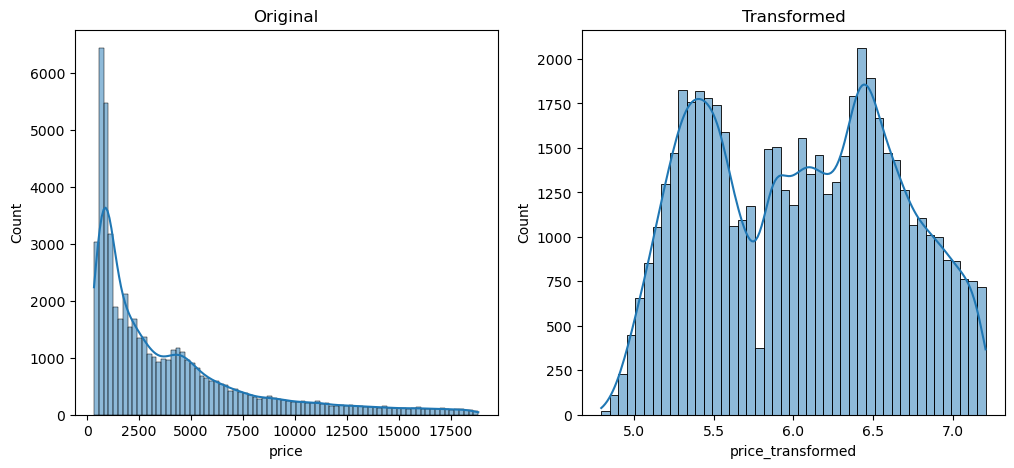

In [36]:
#diamonds["price_transformed"]=diamonds["carat"].apply(lambda x: x**(0.4))

diamonds["price_transformed"],_ = boxcox(diamonds["price"])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(diamonds["price"],kde=True)
plt.title("Original")
plt.subplot(1,2,2)
sns.histplot(diamonds["price_transformed"],kde=True)
plt.title('Transformed')
plt.show()

    Log, exponential, and root transformations were also attempted

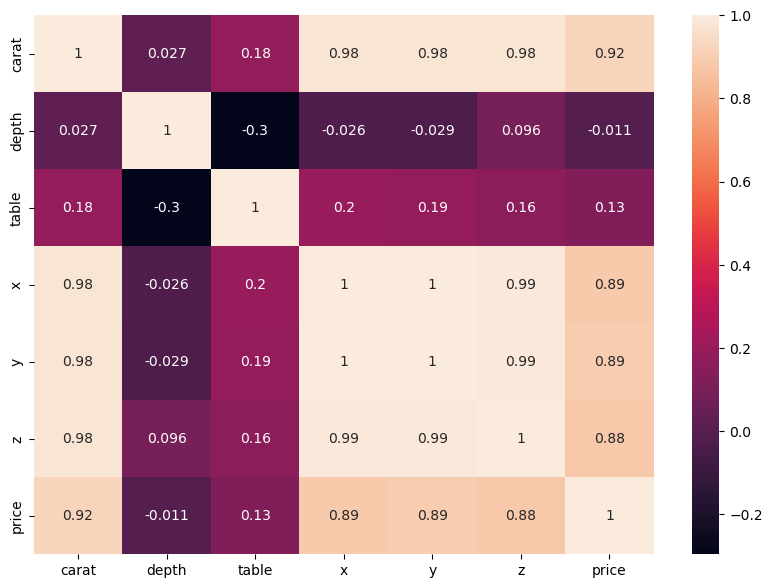

In [38]:
corr = diamonds[diamonds_num_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.show()

    High correlation observed between price and carat, x, y, and z, as well as these 4 features with each other. However, depth, which is engineered based on x,y,z, doesn't seem to be as highly correlated with the target (price) than the original columns, indicating that it may be better to keep them as they are.

In [40]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'carat_encoded', 'cut_encoded', 'color_encoded', 'clarity_encoded',
       'price_transformed'],
      dtype='object')

## Modelling

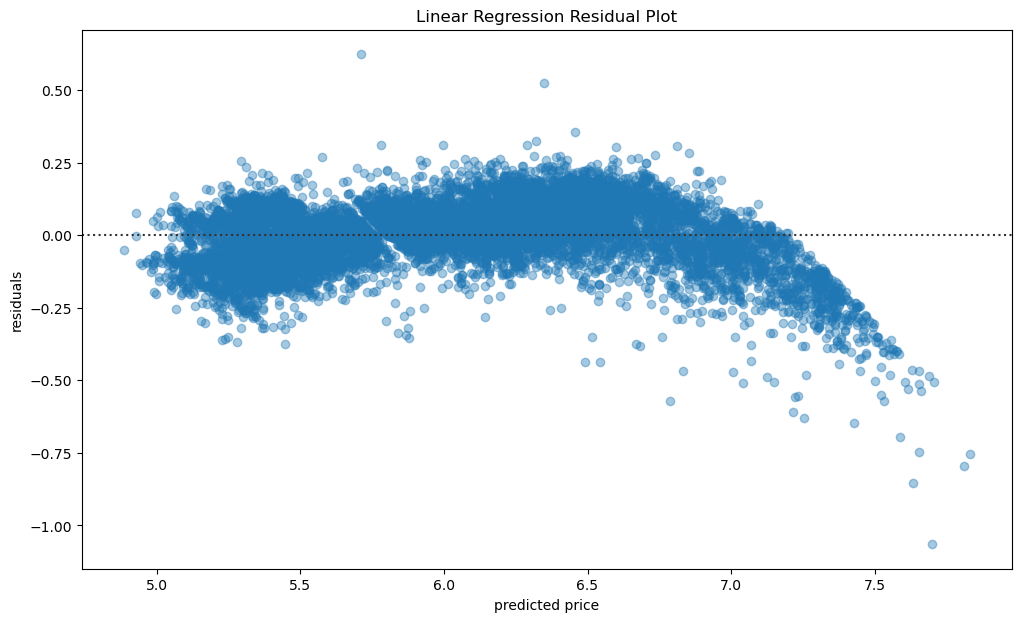


RMSE: 0.1108
R^2: 0.9663


In [42]:
lin_df = diamonds[['depth', 'table', 'x', 'y',
       'z', 'carat_encoded', 'cut_encoded', 'color_encoded', 'clarity_encoded',
        'price_transformed']]

x=lin_df.iloc[:,:-1].values 
y=lin_df.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

regression=LinearRegression()
regression.fit(x_train,y_train)

y_hat = regression.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})

plt.title("Linear Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)


metrics.append({"Model":"Linear_1",
               "RMSE":rmse,
               "R^2":r2})


print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    Even the initial, simple linear regression seems to be performing well, with R^2 of ~0.97. However, this may indicate overfitting, but this will be determined with comparison with future models. The residual plot seems to show consistent predictions, with a little skew at the extreme ends of the graph, almost parabolic. Though this may be due to the price feature itself being especially atypical/skewed/non-normal (even after transformation), it may also indicate that a polynomial regressor may be a better fit. 

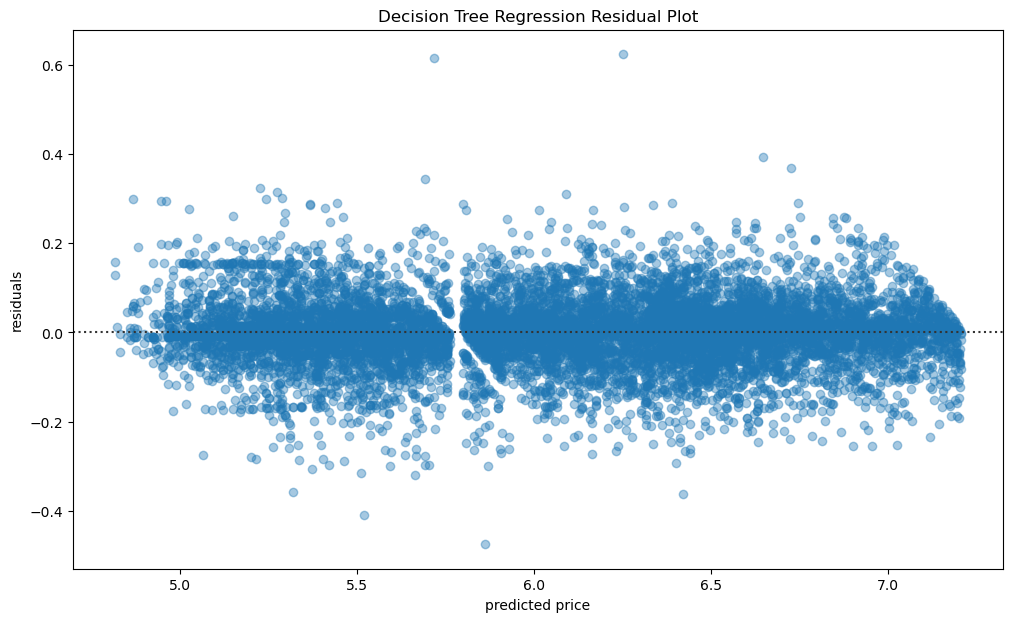


RMSE: 0.0747
R^2: 0.9846


In [44]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)

y_hat = dt.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Decision Tree Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)


metrics.append({"Model":"DT_1",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    The decision tree seems to have performed slightly better than the linear regression, and is consistent across the residual plot, indicating that there is little bias or skew affecting the model. However, there is an abnormal asymptote-like portion of the residual plot. This could be due to how some categorical features were discretized and binned, and should be explored more. 

In [46]:
tree_df = diamonds[['carat','depth', 'table', 'x', 'y',
       'z',  'cut_encoded', 'color_encoded', 'clarity_encoded',
       'price']] #choosing slightly different features since tree-based models may do better with raw data

x2=tree_df.iloc[:,:-1].values 
y2=tree_df.iloc[:,-1].values
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=0) 

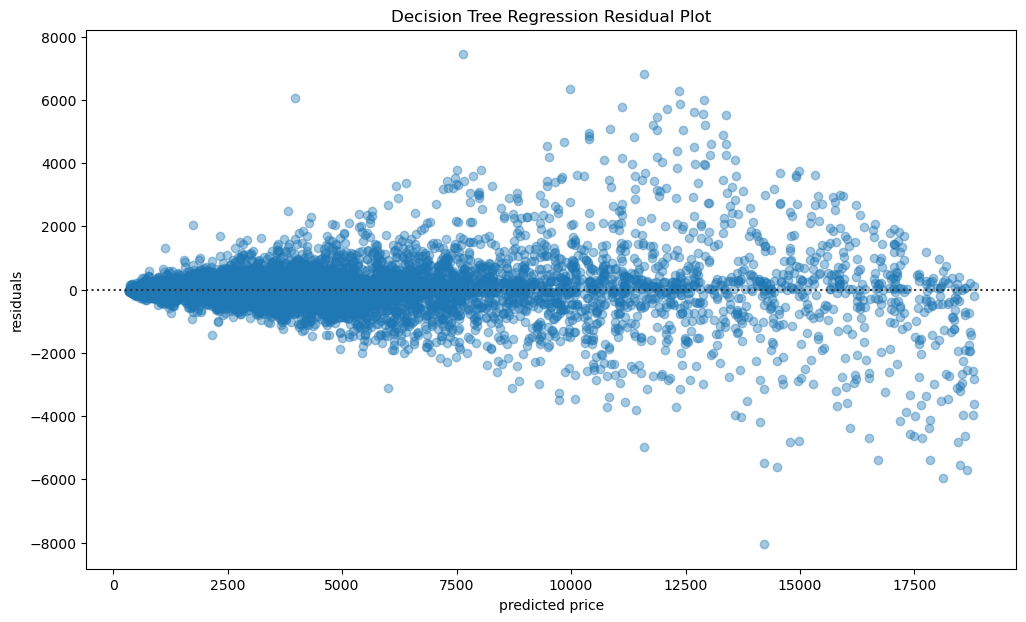


RMSE: 739.6175
R^2: 0.9659


In [47]:
#DECISION TREE 2 WITH DIFFERENT FEATURES
dt = DecisionTreeRegressor()

dt.fit(x_train2,y_train2)

y_hat = dt.predict(x_test2)

residuals = y_test2 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Decision Tree Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test2)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test2,y_hat)


metrics.append({"Model":"DT_2",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    The second decision tree seems to have worsened, however, the RMSE value is skewed because this model is using the raw price data rather than a transformed version. It seems to be "tighter" around the 0 line, but does exhibit heteroskedasticity as values get more extreme.

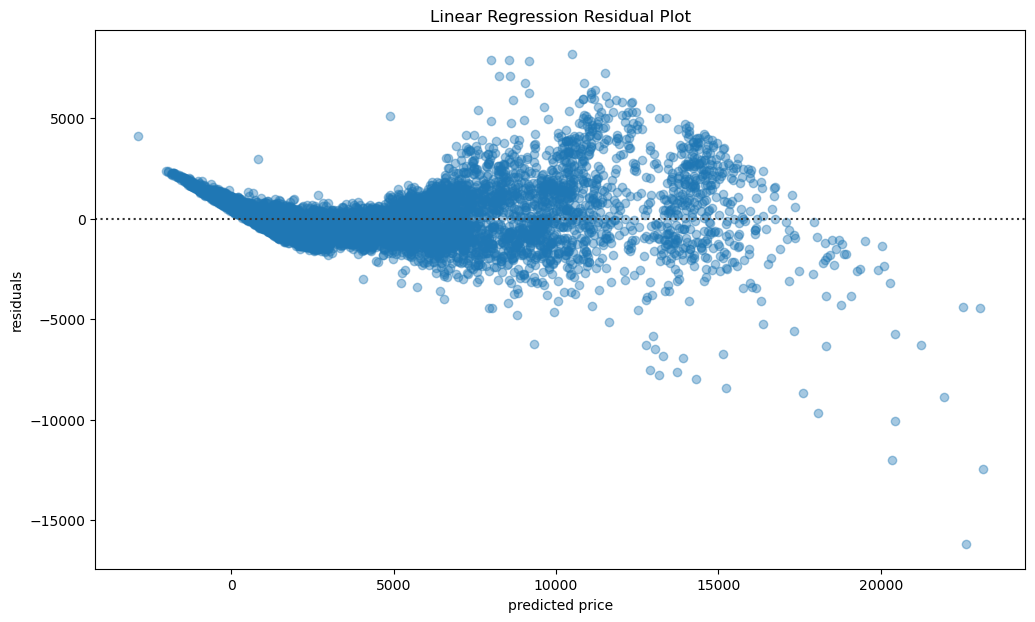


RMSE: 1189.8337
R^2: 0.9118


In [49]:
#LINEAR REGRESSION 2 WITH RAW DATA
regression=LinearRegression()
regression.fit(x_train2,y_train2)

y_hat = regression.predict(x_test2)

residuals = y_test2 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})

plt.title("Linear Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test2)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test2,y_hat)


metrics.append({"Model":"Linear_2",
               "RMSE":rmse,
               "R^2":r2})


print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    As expected, with the "raw" data, the linear model did not perform well. This showcases the importance of preprocessing when intending to use models such as LinearRegressor(). The RMSE is greater than the Decision Tree's of the same data, and the residual plot is inconsistent and heteroskedastic, indicating it is not a good means for prediction. Despite this, it's R^2 is high, which, as mentioned before, could indicate that there is overfitting occurring.

In [51]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'carat_encoded', 'cut_encoded', 'color_encoded', 'clarity_encoded',
       'price_transformed'],
      dtype='object')

In [52]:
corr_df = diamonds[['depth', 'table', 'carat_encoded', 'cut_encoded', 'color_encoded', 'clarity_encoded',
       'price_transformed']] #removing the most inter-correlated features
x3=corr_df.iloc[:,:-1].values 
y3=corr_df.iloc[:,-1].values
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.2,random_state=0) 

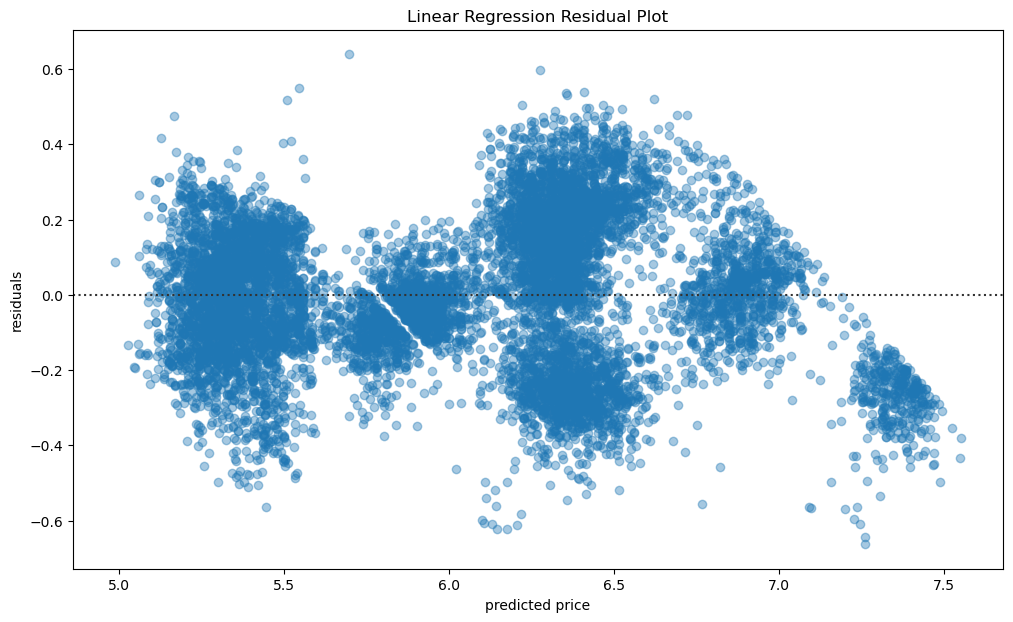


RMSE: 0.1912
R^2: 0.8995


In [53]:
#LINEAR REGRESSION 3 WITHOUT CORRELATED COLUMNS
regression=LinearRegression()
regression.fit(x_train3,y_train3)

y_hat = regression.predict(x_test3)

residuals = y_test3 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})

plt.title("Linear Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test3)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test3,y_hat)


metrics.append({"Model":"Linear_3",
               "RMSE":rmse,
               "R^2":r2})


print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    Attempting to control for multicollinearity seems to have negatively affected the model, as is evident by the very irregular, clumped patterns appearing in the residual graph

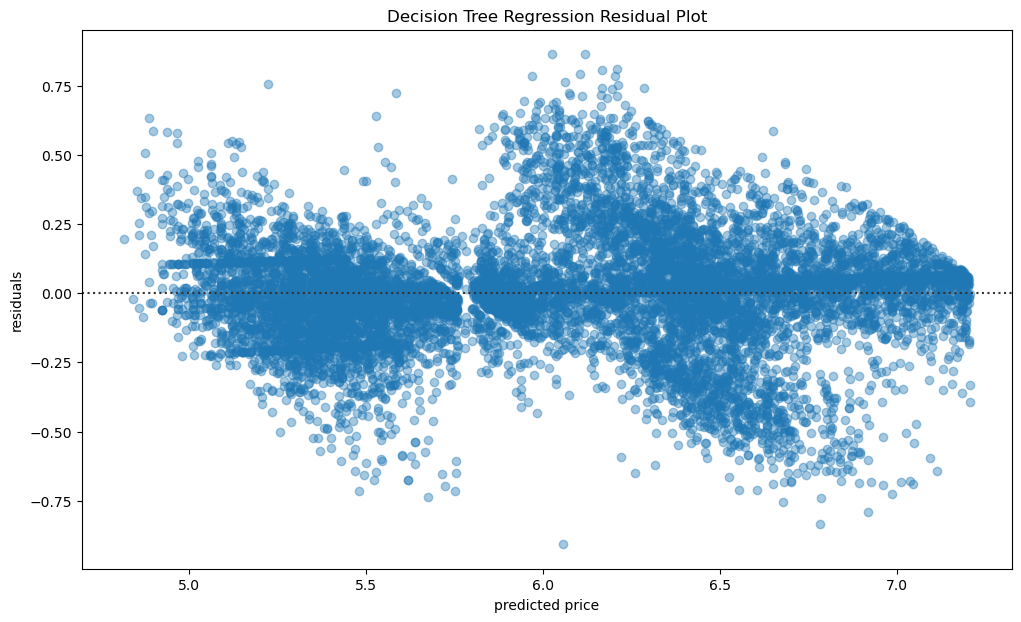


RMSE: 0.214
R^2: 0.8741


In [55]:
#DECISION TREE 3 CONTROLLING FOR MULTICOLLINEARITY
dt = DecisionTreeRegressor()

dt.fit(x_train3,y_train3)

y_hat = dt.predict(x_test3)

residuals = y_test3 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Decision Tree Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test3)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test3,y_hat)


metrics.append({"Model":"DT_3",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    The decision tree suffered similarly to the linear regression model when trying to account for multicollinearity. This seems to confirm an earlier hypothesis that despite being highly correlated, the x, y, and z features are important for the mdoel's predictive capabilities.

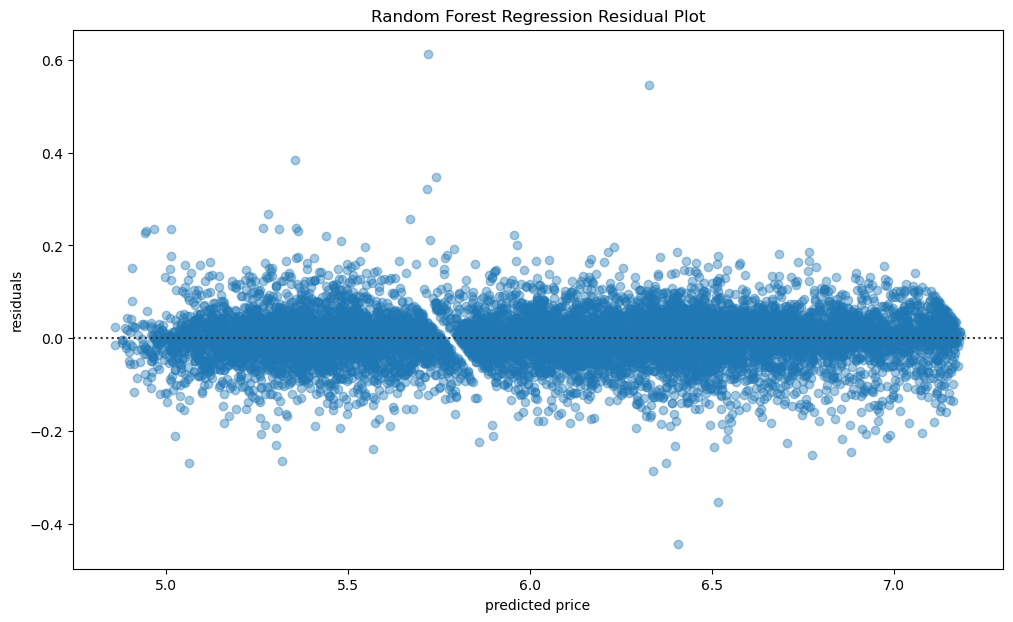


RMSE: 0.0535
R^2: 0.9921


In [57]:
#RANDOM FOREST
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_hat = rf.predict(x_test)

residuals = y_test - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Random Forest Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test,y_hat)


metrics.append({"Model":"RF_1",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

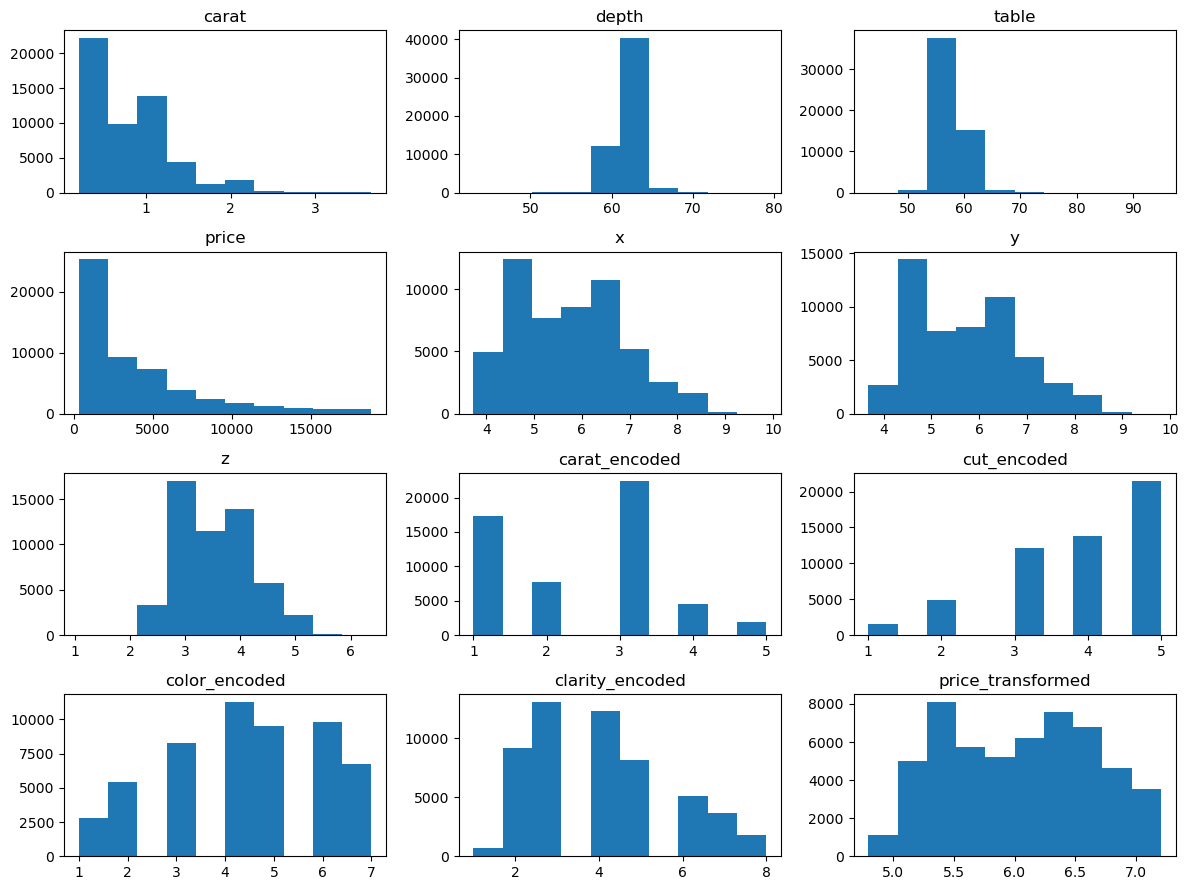

In [58]:
diamonds.hist(grid=False,figsize=(12,9))
plt.tight_layout()
plt.show()

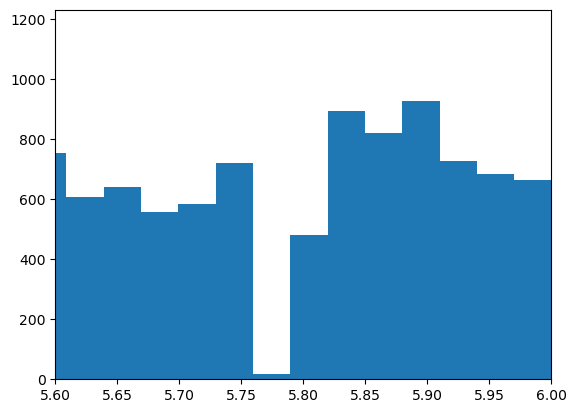

In [59]:
diamonds["price_transformed"].hist(grid=False,bins=80)
plt.xlim(5.6,6)
plt.show()

    The consistent "asymptote" appearing in the residual plots seems to be caused, in part, by a gap inherent in the price column itself, which carried over to its transformation. This is a gap in the given data and in the future, it could prove beneficial to "fix" this with quantile transformations or other data manipulation methods of the sort. Either way, the random forest model seems to have performed the best so far, with an R^2 of 0.99 and the lowest (relatively) RMSE value, indicating that it is more consistently predicting prices close to the actual values.

In [60]:
metrics

[{'Model': 'Linear_Baseline', 'RMSE': 1482.0231, 'R^2': 0.8614410409116099},
 {'Model': 'Linear_1', 'RMSE': 0.1108, 'R^2': 0.9662517195965836},
 {'Model': 'DT_1', 'RMSE': 0.0747, 'R^2': 0.9846443089733733},
 {'Model': 'DT_2', 'RMSE': 739.6175, 'R^2': 0.965916954356529},
 {'Model': 'Linear_2', 'RMSE': 1189.8337, 'R^2': 0.91179431905447},
 {'Model': 'Linear_3', 'RMSE': 0.1912, 'R^2': 0.8994934673352094},
 {'Model': 'DT_3', 'RMSE': 0.214, 'R^2': 0.8740578534653498},
 {'Model': 'RF_1', 'RMSE': 0.0535, 'R^2': 0.9921427478934783}]

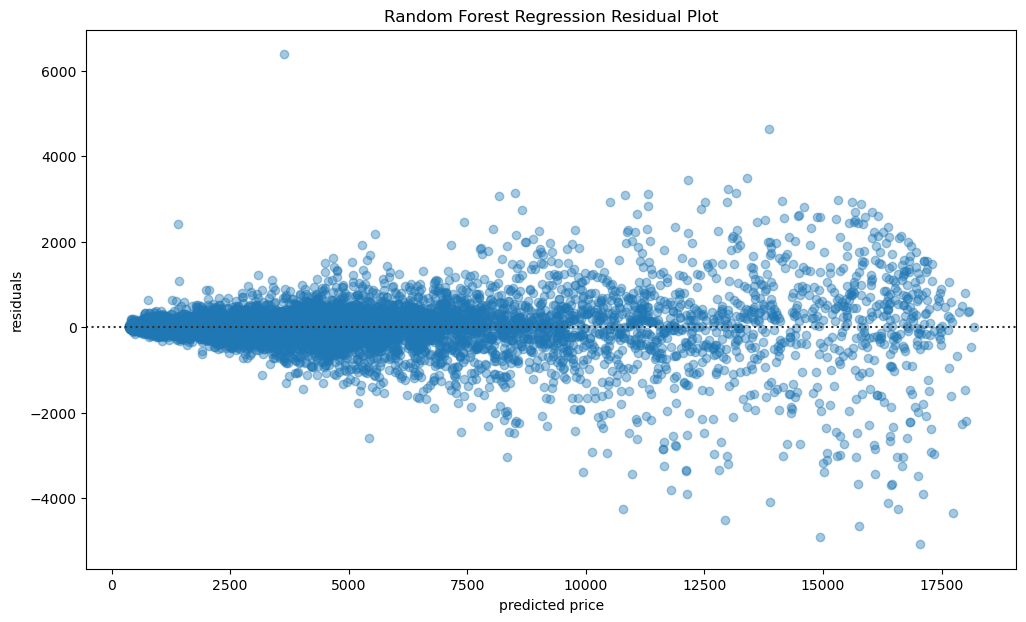


RMSE: 526.7824
R^2: 0.9827


In [62]:
#RANDOM FOREST 2 WITH "RAW" DATA
rf = RandomForestRegressor()

rf.fit(x_train2,y_train2)

y_hat = rf.predict(x_test2)

residuals = y_test2 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Random Forest Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test2)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test2,y_hat)


metrics.append({"Model":"RF_2",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    As with the other models utilizing this subdivision of the dataframe, the random forest exhibits heteroskedasticity. Even so, it has performed better than the other models within this strata. Because of the heteroskedasticity, I would not reccommend this model for its predictive use. Interestingly, this model doesn't seem to exhibit the "asymptote" the others have.

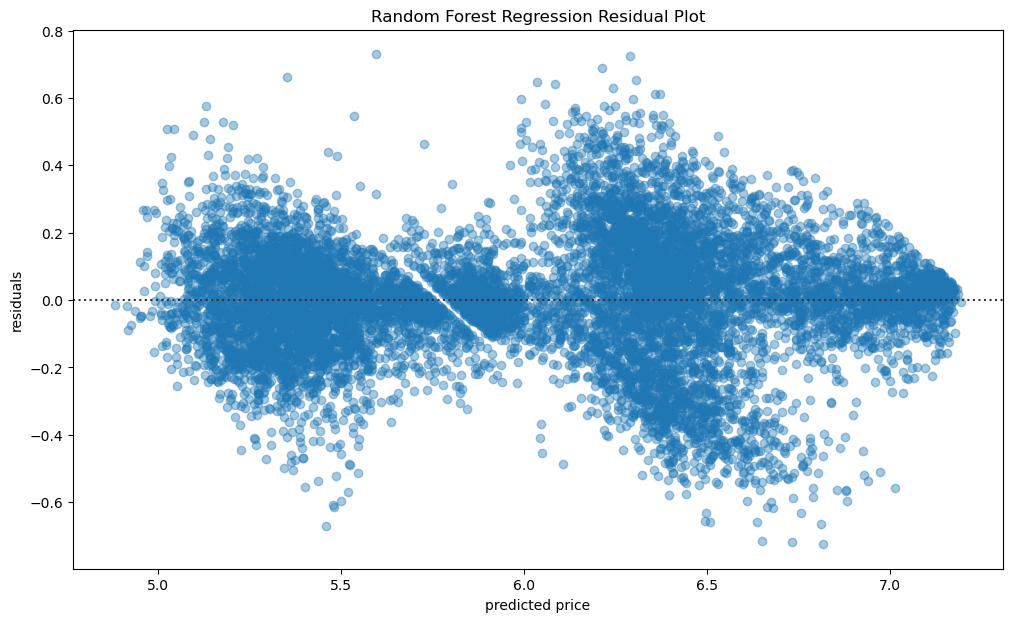


RMSE: 0.1802
R^2: 0.9108


In [64]:
#RANDOM FOREST 3 CONTROLLING FOR MULTICOLLINEARITY
rf = RandomForestRegressor()

rf.fit(x_train3,y_train3)

y_hat = rf.predict(x_test3)

residuals = y_test3 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Random Forest Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test3)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test3,y_hat)


metrics.append({"Model":"RF_3",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    The random forest has, again, outperformed the other models using this section of the dataframe. However, the residual plot is irregular and exhibits clustering. The best model proves to be RF_1

In [66]:
metrics

[{'Model': 'Linear_Baseline', 'RMSE': 1482.0231, 'R^2': 0.8614410409116099},
 {'Model': 'Linear_1', 'RMSE': 0.1108, 'R^2': 0.9662517195965836},
 {'Model': 'DT_1', 'RMSE': 0.0747, 'R^2': 0.9846443089733733},
 {'Model': 'DT_2', 'RMSE': 739.6175, 'R^2': 0.965916954356529},
 {'Model': 'Linear_2', 'RMSE': 1189.8337, 'R^2': 0.91179431905447},
 {'Model': 'Linear_3', 'RMSE': 0.1912, 'R^2': 0.8994934673352094},
 {'Model': 'DT_3', 'RMSE': 0.214, 'R^2': 0.8740578534653498},
 {'Model': 'RF_1', 'RMSE': 0.0535, 'R^2': 0.9921427478934783},
 {'Model': 'RF_2', 'RMSE': 526.7824, 'R^2': 0.9827103355839599},
 {'Model': 'RF_3', 'RMSE': 0.1802, 'R^2': 0.9107573547642868}]

In [67]:
#sorting
metrics = [metrics[0],metrics[1],metrics[4],metrics[5],metrics[2],metrics[3],metrics[6],metrics[-3],metrics[-2],metrics[-1]]
metrics

[{'Model': 'Linear_Baseline', 'RMSE': 1482.0231, 'R^2': 0.8614410409116099},
 {'Model': 'Linear_1', 'RMSE': 0.1108, 'R^2': 0.9662517195965836},
 {'Model': 'Linear_2', 'RMSE': 1189.8337, 'R^2': 0.91179431905447},
 {'Model': 'Linear_3', 'RMSE': 0.1912, 'R^2': 0.8994934673352094},
 {'Model': 'DT_1', 'RMSE': 0.0747, 'R^2': 0.9846443089733733},
 {'Model': 'DT_2', 'RMSE': 739.6175, 'R^2': 0.965916954356529},
 {'Model': 'DT_3', 'RMSE': 0.214, 'R^2': 0.8740578534653498},
 {'Model': 'RF_1', 'RMSE': 0.0535, 'R^2': 0.9921427478934783},
 {'Model': 'RF_2', 'RMSE': 526.7824, 'R^2': 0.9827103355839599},
 {'Model': 'RF_3', 'RMSE': 0.1802, 'R^2': 0.9107573547642868}]

In [68]:
metrics_df = pd.DataFrame(metrics)
metrics_df

Model       RMSE       R^2
0  Linear_Baseline  1482.0231  0.861441
1         Linear_1     0.1108  0.966252
2         Linear_2  1189.8337  0.911794
3         Linear_3     0.1912  0.899493
4             DT_1     0.0747  0.984644
5             DT_2   739.6175  0.965917
6             DT_3     0.2140  0.874058
7             RF_1     0.0535  0.992143
8             RF_2   526.7824  0.982710
9             RF_3     0.1802  0.910757

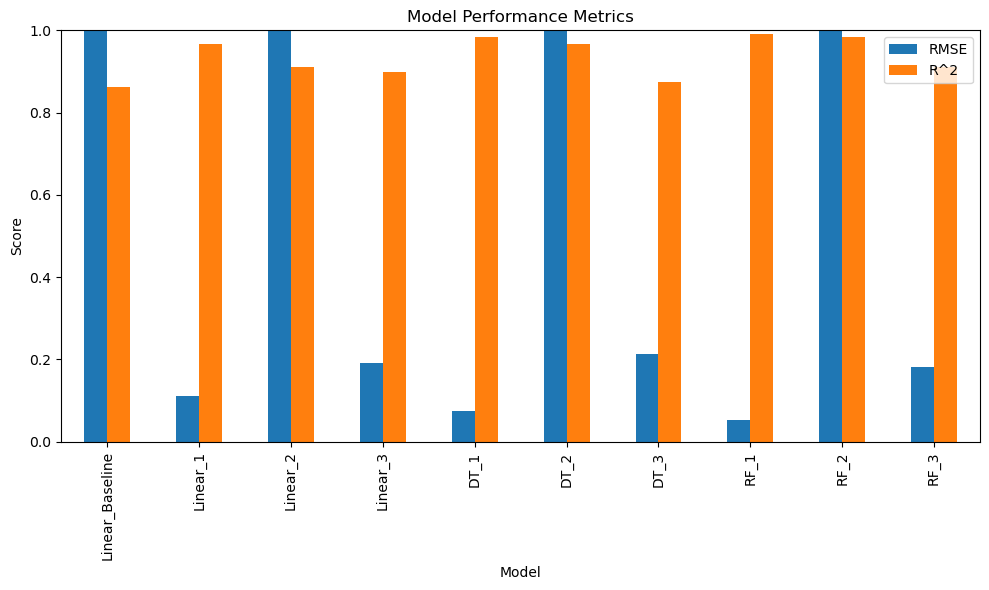

In [69]:
#metrics_df.set_index('Model', inplace=True)

metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

    Lower RMSE indicates a better model, whereas higher R^2 also indicates a better model. As mentioned before, this graph shows RF_1 is the best model.

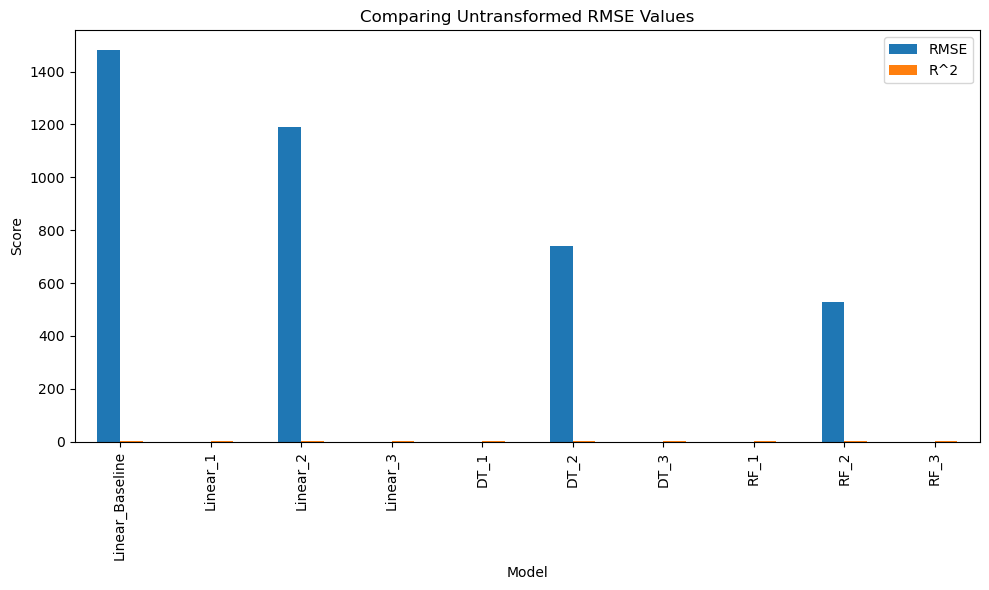

In [71]:
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparing Untransformed RMSE Values')
plt.ylabel('Score')
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

    The Baseline, as well as models trained on the "second" subdivision of the cleaned dataset used an untransformed version of the Price/target variable, so have higher RMSE values, due to being on a different scale (depicted above).

In [72]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   carat_encoded  cut_encoded  color_encoded  clarity_encoded  \
0              1            5              6                2   
1              1            4              6                3   
2              1            2              6                5   
3              1            4              2                4   
4              1            2              1                2   

   price_transformed  
0           4.796051  
1           4.796051  
2           4.798129  
3           4.812483  
4           4.814507

In [73]:
lin_df.columns

Index(['depth', 'table', 'x', 'y', 'z', 'carat_encoded', 'cut_encoded',
       'color_encoded', 'clarity_encoded', 'price_transformed'],
      dtype='object')

In [74]:
df_4 = diamonds[['x', 'y', 'z', 'carat_encoded', 'cut_encoded',
       'color_encoded', 'clarity_encoded', 'price_transformed']]
x4=corr_df.iloc[:,:-1].values 
y4=corr_df.iloc[:,-1].values
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=0.2,random_state=0) 

    *Chosen based on earlier correlation matrix

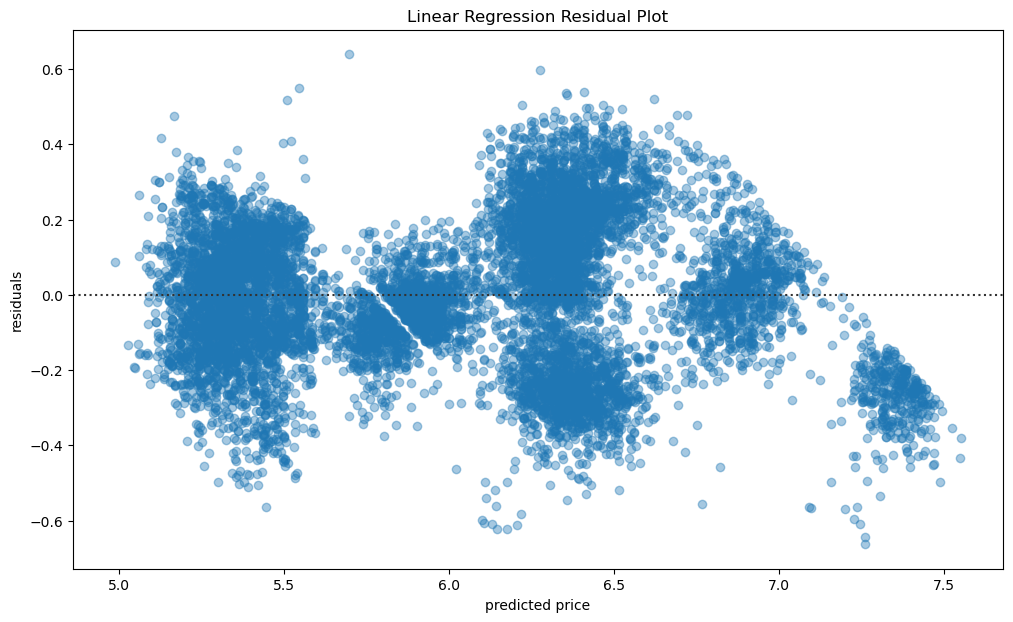


RMSE: 0.1912
R^2: 0.8995


In [75]:
#LINEAR REGRESSION 4 WITH HIGHLY CORRELATED COLUMNS
regression=LinearRegression()
regression.fit(x_train4,y_train4)

y_hat = regression.predict(x_test4)

residuals = y_test4 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})

plt.title("Linear Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test4)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test4,y_hat)


metrics.append({"Model":"Linear_4",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

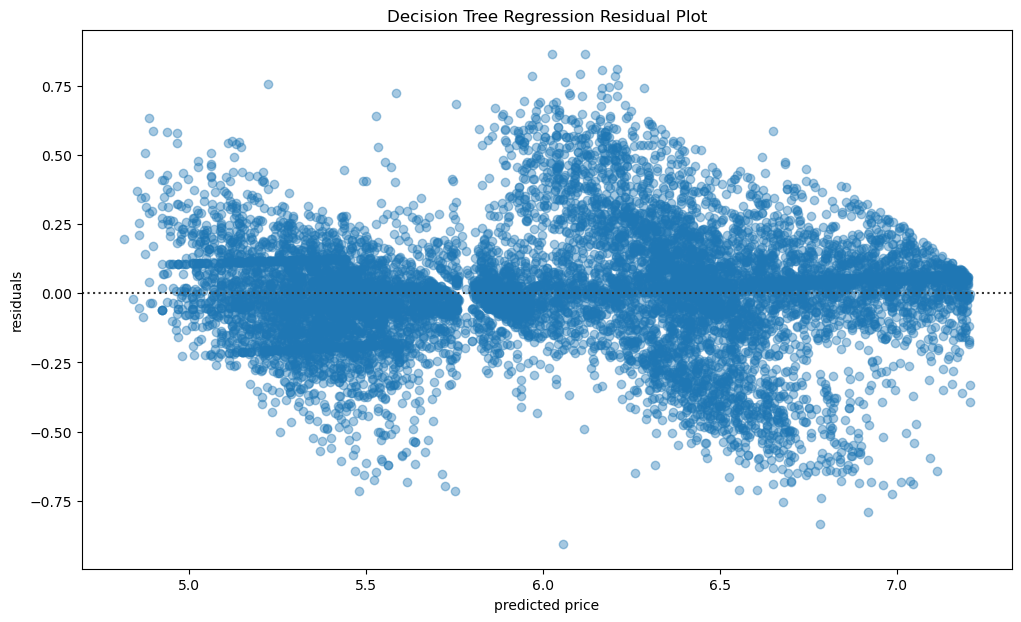


RMSE: 0.2139
R^2: 0.8743


In [76]:
#DECISION TREE 4 WITH HIGHLY CORRELATED COLUMNS
dt = DecisionTreeRegressor()

dt.fit(x_train4,y_train4)

y_hat = dt.predict(x_test4)

residuals = y_test4 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Decision Tree Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test4)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test4,y_hat)


metrics.append({"Model":"DT_4",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

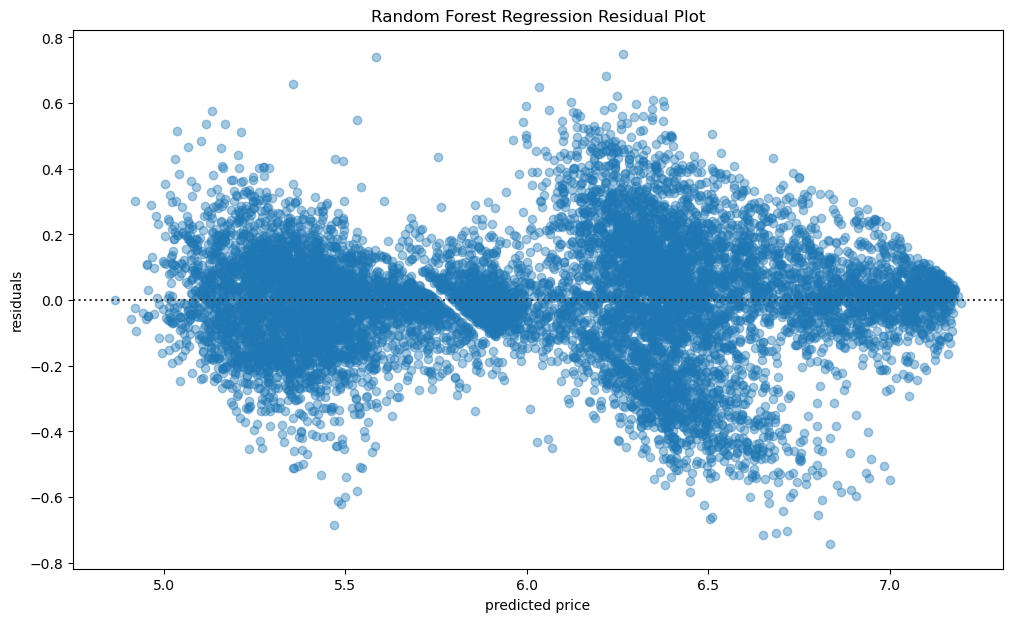


RMSE: 0.1799
R^2: 0.911


In [134]:
#RANDOM FOREST 4 WITH HIGHLY CORRELATED COLUMNS
rf = RandomForestRegressor()

rf.fit(x_train3,y_train4)

y_hat = rf.predict(x_test4)

residuals = y_test4 - y_hat

plt.figure(figsize=(12,7))
sns.residplot(x=y_hat, y=residuals, scatter_kws={'alpha': 0.4})
plt.title("Random Forest Regression Residual Plot")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.show()

mse = np.mean((y_hat-y_test4)**2)
rmse = round(mse**0.5,4)
r2=r2_score(y_test4,y_hat)


metrics.append({"Model":"RF_4",
               "RMSE":rmse,
               "R^2":r2})

print("\nRMSE:",rmse)
print(f"R^2: {round(r2,4)}")

    It was intended to also use xgboosting models, but because of the success with random forest (and the possibility of overfitting), it was deemed unnecessary. Simplifying the model may be necessary. Some other methods I'd like to implement in the future are feature selection or engineering, cross-validation, more rigorous model tuning (e.g., grid search), and attempting to explain and maybe account for the "gap" seen on the residual graphs.

In [141]:
metrics_df = pd.DataFrame(metrics)
metrics_df

Model       RMSE       R^2
0   Linear_Baseline  1482.0231  0.861441
1          Linear_1     0.1108  0.966252
2          Linear_2  1189.8337  0.911794
3          Linear_3     0.1912  0.899493
4              DT_1     0.0747  0.984644
5              DT_2   739.6175  0.965917
6              DT_3     0.2140  0.874058
7              RF_1     0.0535  0.992143
8              RF_2   526.7824  0.982710
9              RF_3     0.1802  0.910757
10         Linear_4     0.1912  0.899493
11             DT_4     0.2139  0.874258
12             RF_4     0.1799  0.911047

In [149]:
metrics_df[["Model","R^2","RMSE"]].sort_values("R^2").T

0         6         11        3         10        9   \
Model  Linear_Baseline      DT_3      DT_4  Linear_3  Linear_4      RF_3   
R^2           0.861441  0.874058  0.874258  0.899493  0.899493  0.910757   
RMSE         1482.0231     0.214    0.2139    0.1912    0.1912    0.1802   

             12         2         5         1         8         4         7   
Model      RF_4   Linear_2      DT_2  Linear_1      RF_2      DT_1      RF_1  
R^2    0.911047   0.911794  0.965917  0.966252   0.98271  0.984644  0.992143  
RMSE     0.1799  1189.8337  739.6175    0.1108  526.7824    0.0747    0.0535

In [152]:
def model(x):
    y = x[:2]
    if y == "Li":
        return "LinReg"
    elif y == "DT":
        return "DTree"
    elif y == "RF":
        return "RandFor"

metrics_df["Model Type"] = metrics_df["Model"].apply(lambda x: model(x))
metrics_df

Model       RMSE       R^2 Model Type
0   Linear_Baseline  1482.0231  0.861441     LinReg
1          Linear_1     0.1108  0.966252     LinReg
2          Linear_2  1189.8337  0.911794     LinReg
3          Linear_3     0.1912  0.899493     LinReg
4              DT_1     0.0747  0.984644      DTree
5              DT_2   739.6175  0.965917      DTree
6              DT_3     0.2140  0.874058      DTree
7              RF_1     0.0535  0.992143    RandFor
8              RF_2   526.7824  0.982710    RandFor
9              RF_3     0.1802  0.910757    RandFor
10         Linear_4     0.1912  0.899493     LinReg
11             DT_4     0.2139  0.874258      DTree
12             RF_4     0.1799  0.911047    RandFor

In [158]:
metrics_df.groupby("Model Type")["R^2"].mean()

Model Type
DTree      0.924719
LinReg     0.907695
RandFor    0.949164
Name: R^2, dtype: float64

In [164]:
metrics_df.groupby("Model Type")["RMSE"].mean()

Model Type
DTree      185.030025
LinReg     534.470000
RandFor    131.799000
Name: RMSE, dtype: float64

In [166]:
metrics_df[["Model Type","Model","RMSE","R^2"]].sort_values("Model Type")

Model Type            Model       RMSE       R^2
4       DTree             DT_1     0.0747  0.984644
5       DTree             DT_2   739.6175  0.965917
6       DTree             DT_3     0.2140  0.874058
11      DTree             DT_4     0.2139  0.874258
0      LinReg  Linear_Baseline  1482.0231  0.861441
1      LinReg         Linear_1     0.1108  0.966252
2      LinReg         Linear_2  1189.8337  0.911794
3      LinReg         Linear_3     0.1912  0.899493
10     LinReg         Linear_4     0.1912  0.899493
7     RandFor             RF_1     0.0535  0.992143
8     RandFor             RF_2   526.7824  0.982710
9     RandFor             RF_3     0.1802  0.910757
12    RandFor             RF_4     0.1799  0.911047

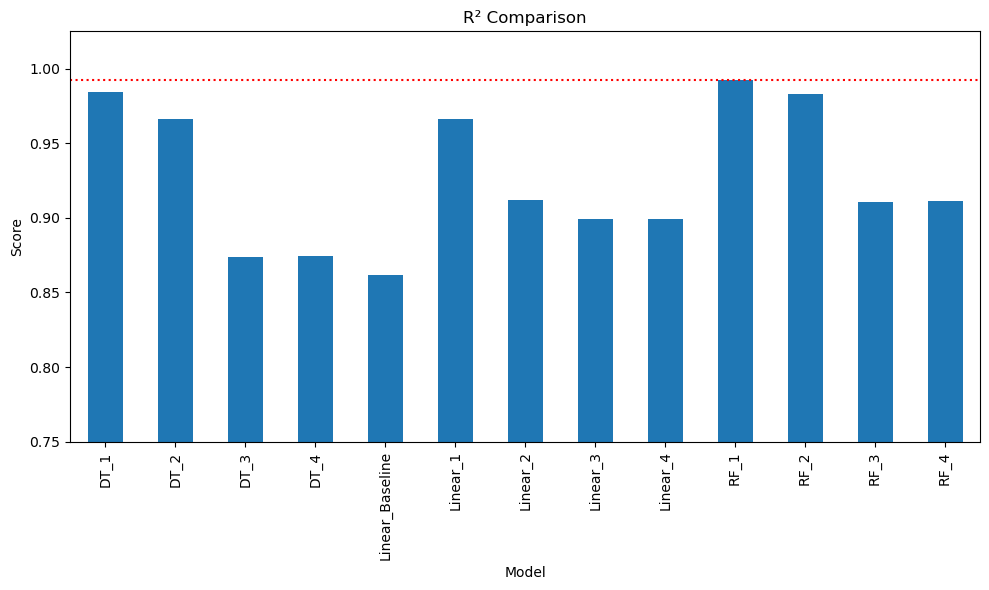

In [278]:
#metrics_df
metrics_df[["Model Type","Model","RMSE","R^2"]].sort_values("Model Type").set_index('Model')["R^2"].plot(kind='bar', figsize=(10, 6))
plt.axline((0,transformed_metrics["R^2"].max()),slope=0,linestyle=":",color="red")
plt.title('R² Comparison')
plt.ylabel('Score')
plt.ylim(0.75, 1.025)
plt.tight_layout()
plt.show()

In [238]:
transformed_metrics = metrics_df[metrics_df["RMSE"]<1]
transformed_metrics

Model    RMSE       R^2 Model Type
1   Linear_1  0.1108  0.966252     LinReg
3   Linear_3  0.1912  0.899493     LinReg
4       DT_1  0.0747  0.984644      DTree
6       DT_3  0.2140  0.874058      DTree
7       RF_1  0.0535  0.992143    RandFor
9       RF_3  0.1802  0.910757    RandFor
10  Linear_4  0.1912  0.899493     LinReg
11      DT_4  0.2139  0.874258      DTree
12      RF_4  0.1799  0.911047    RandFor

In [242]:
non_transformed_metrics = metrics_df[metrics_df["RMSE"]>1]
non_transformed_metrics

Model       RMSE       R^2 Model Type
0  Linear_Baseline  1482.0231  0.861441     LinReg
2         Linear_2  1189.8337  0.911794     LinReg
5             DT_2   739.6175  0.965917      DTree
8             RF_2   526.7824  0.982710    RandFor

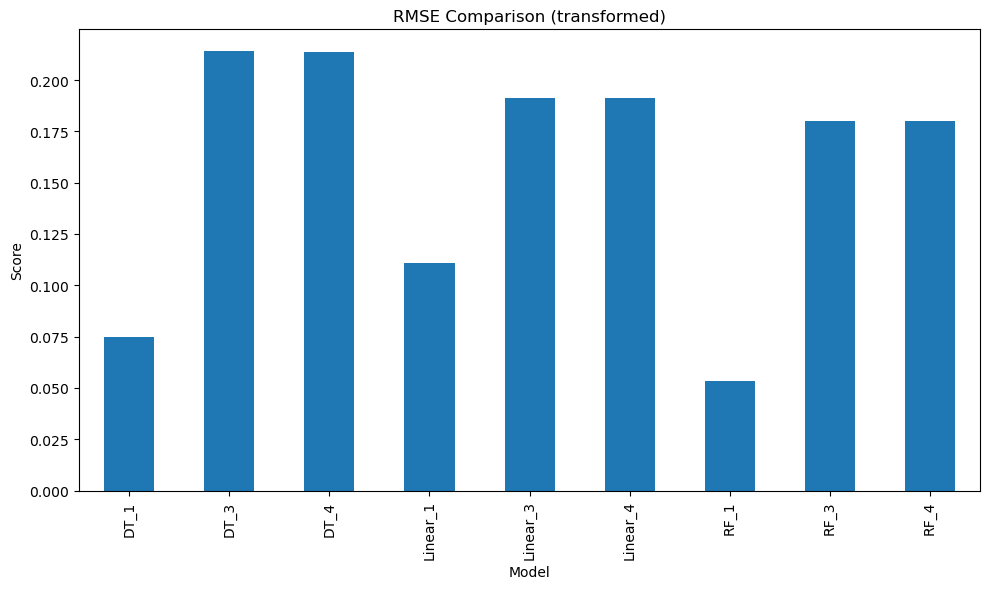

In [280]:
transformed_metrics[["Model Type","Model","RMSE","R^2"]].sort_values("Model Type").set_index('Model')["RMSE"].plot(kind='bar', figsize=(10, 6))

plt.title('RMSE Comparison (transformed)')
plt.ylabel('Score')
#plt.ylim()
plt.tight_layout()
plt.show()

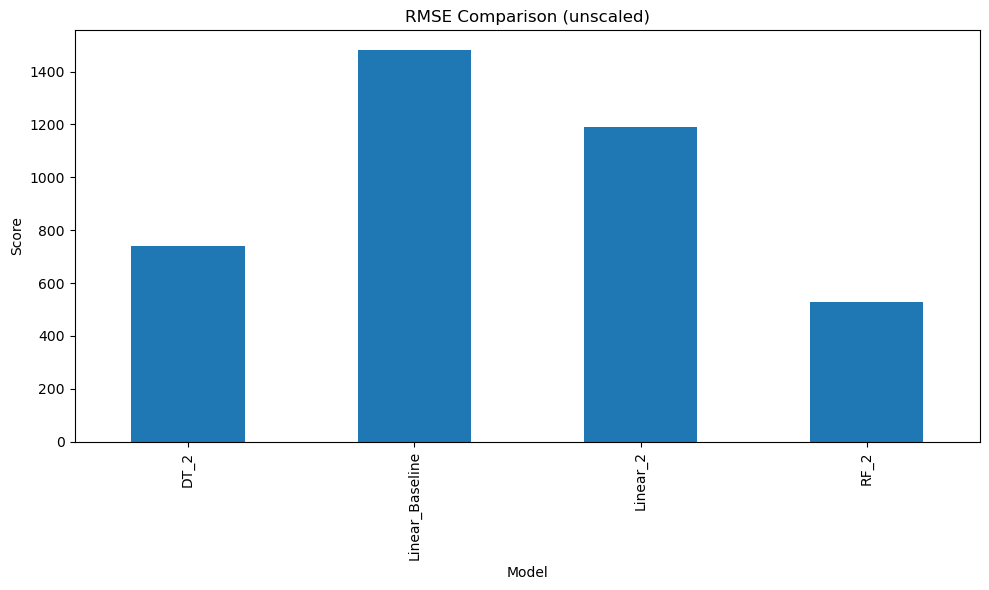

In [248]:
non_transformed_metrics[["Model Type","Model","RMSE","R^2"]].sort_values("Model Type").set_index('Model')["RMSE"].plot(kind='bar', figsize=(10, 6))

plt.title('RMSE Comparison (unscaled)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [290]:
#diamonds.to_csv("diamonds_processed.csv",index=False)